In [1]:
#td monte carlo

RANDU

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def randu(N, s):
    m = 2**31
    x = np.zeros(N)
    x[0] = s
    for i in range(1,N):
        x[i] = (65539*x[i-1])%m
    return(x)

plt.scatter(np.arange(100), randu(100, 42))

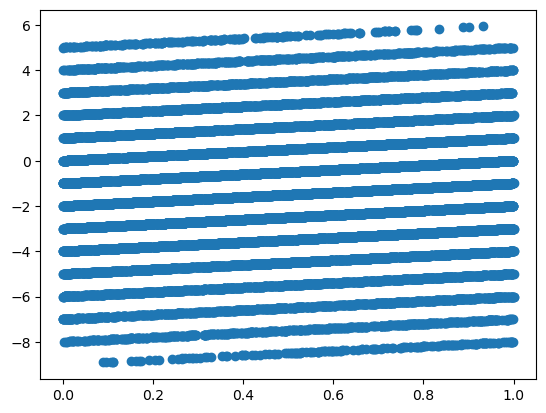

In [3]:
def randu_improved(N,s):
    m = 2**31
    x = np.zeros(N)
    x[0] = s
    x[1] = (65539*x[0])%m
    for i in range(2, N):
        x[i] = (6*x[i-1] - 9*x[i-2])%m
    return(x)

y = randu_improved(2*(10**4), 42)/(2**31)
plt.scatter(y[2:], 6*y[1:-1] - 9*y[0:-2])
#plt.xlim(0, 0.5)
#plt.ylim(0, 0.5)


In [4]:
import plotly.express as px
import pandas as pd

# créer un dataframe pour les données
df = pd.DataFrame({'u(n)': y[0:-2], 'u(n-1)': y[1:-1], 'u(n-2)': y[2:]})

# tracer le graphique en 3D
fig = px.scatter_3d(df, x='u(n)', y='u(n-1)', z='u(n-2)')

# afficher le graphique
fig.show()

Geometric distribution

In [5]:
import numpy as np
def ber(p):
    x = np.random.rand()
    return(int(x<=p))


In [6]:
import numpy as np
def geom_rejection(p):
    b = ber(p)
    cpt = 1
    while b==0:
        cpt = cpt + 1
        b = ber(p)
    return(cpt)

geom_rejection(0.5)

1

In [7]:
#td2
import numpy as np
import math
def geom_inversion(p):
    y = np.random.rand()
    return(np.ceil(np.log(1-y)/np.log(1-p)))
geom_inversion(0.5)


2.0

(array([752., 131.,  56.,  28.,  20.,  10.,   2.,   0.,   0.,   1.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

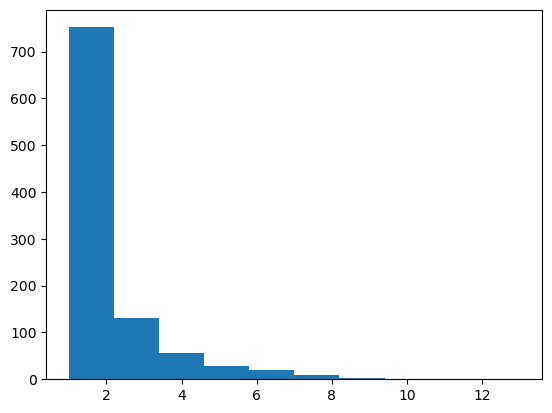

In [8]:
import matplotlib.pyplot as plt
h = []
for i in range(1000):
    h.append(geom_rejection(0.5))
plt.hist(h)

In [9]:
#correction inversion
import numpy as np

def Fm1(y,p):
    return(np.ceil(np.log(1-y)/np.log(1-p)))
def geominv(p):
    u = np.random.rand()
    return(Fm1(u,p))
def testgeominv(p, N):
    arr = np.zeros(N)
    for i in range(N):
        arr[i] = geominv(p)
    plt.hist(arr)
testgeominv(0.5, 1000)

In [10]:
#correction rejection
def bernoulli(p):
    x = np.random.rand()
    return(int(x<=p))

def geomrej(p):
    N = 0
    Z = 0
    while Z != 1:
        Z = bernoulli(p)
        N = N+1
    return(N)

def testgeomrej(p, N):
    arr = np.zeros(N)
    for i in range(N):
        arr[i] = geomrej(p)
    plt.hist(arr)
testgeominv(0.5, 1000)

LAPLACE AND REJECTION

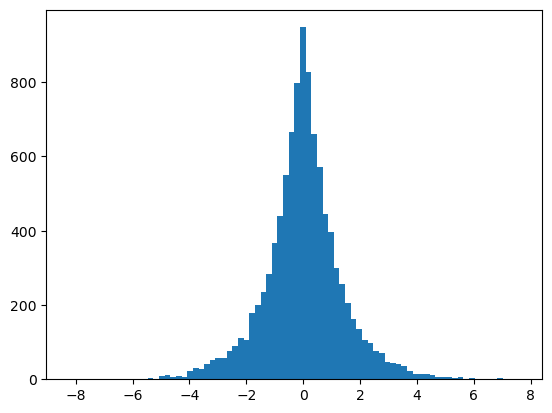

In [11]:
#inversion
import numpy as np 
import matplotlib.pyplot as plt

def Fm1(y):
    if y<=1/2:
        return(np.log(2*y))
    else:
        return(-np.log(2*(1-y)))

def laplaceinv():
    y = np.random.rand()
    return(Fm1(y))

def testlaplaceinv(N):
    arr = np.zeros(N)
    for i in range(N):
        arr[i] = laplaceinv()
    plt.hist(arr, bins = 80)

testlaplaceinv(10000)

In [16]:
#correction rejection
import numpy as np

def p(x):
    return((1/2)*np.exp(-np.abs(x)))

def q(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-x**2/2))

M = np.sqrt(2*np.exp(1)/np.pi)

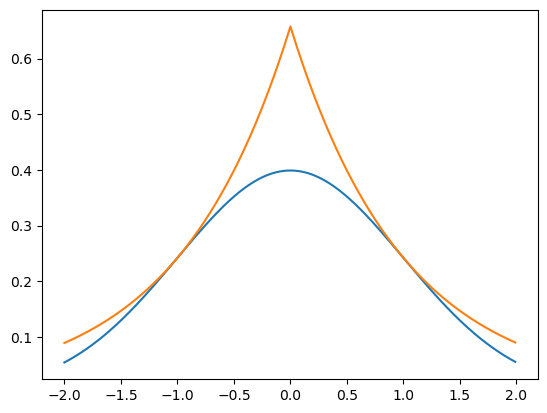

In [34]:
plt.plot(np.arange(-2, 2, 0.01), q(np.arange(-2, 2, 0.01)))
plt.plot(np.arange(-2, 2, 0.01), M*p(np.arange(-2, 2, 0.01)))

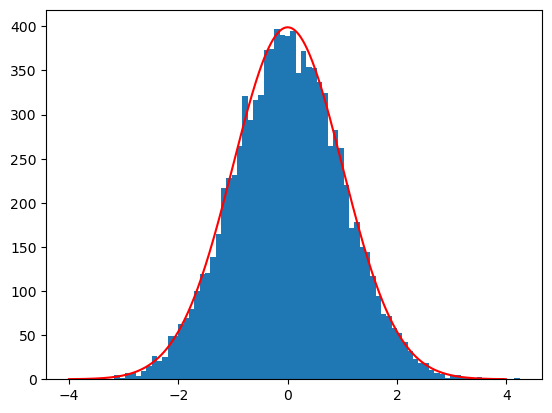

In [41]:
def laplacerej(M):
    u = np.random.rand()
    x = np.random.laplace(0, 1, 1) #laplaceinv()
    while u > q(x)/(M*p(x)):
        u = np.random.rand()
        x = np.random.laplace(0, 1, 1) #laplaceinv()
    return(x)

def testlaplacerej(N):
    arr = np.zeros(N)
    for i in range(N):
        arr[i] = laplacerej(M)
    plt.hist(arr, bins = 80)

testlaplacerej(10000)

xx = np.arange(-4,4,0.01)
yy = (1/np.sqrt(np.pi*2))*np.exp(-xx**2/2)*1000
plt.plot(xx,yy, color = 'r')

In [39]:
#TD3
import numpy as np
import pandas as pd

In [40]:
def Gibbs_sampler(rho = 1/2, T = 1000, x1_0 = 0, x2_0 = 0):
    x1 = x1_0
    x2 = x2_0
    for t in range(T):
        x1 = np.random.normal(rho*x2,1-rho**2,1)
        x2 = np.random.normal(rho*x1,1-rho**2,1)
    return(x1, x2)
#ainsi, on a (x1, x2) ~ N(0, ∑)



In [41]:
def test_gibbs(N,x0):
    X = np.zeros((N,2))
    X[0,0], X[0,1] = x0
    for i in range(N):
        X[i,0], X[i,1] = Gibbs_sampler(x1_0 = 0, x2_0 = 0, rho = 1/2, T = 4)
    return(X)

/tmp/ipykernel_222/434797118.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


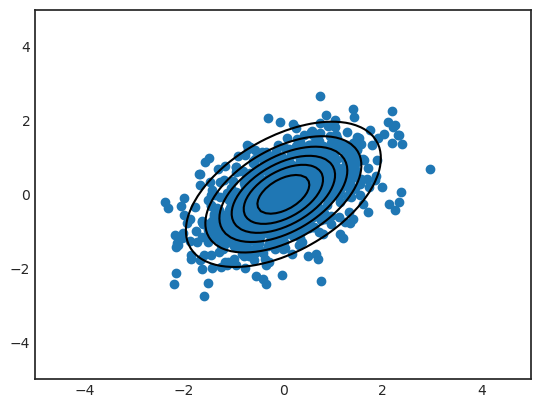

In [42]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

#préparation des données pour le contour
def f(x, y, rho = 1/2):
    return (1/np.pi*np.sqrt(1-rho**2))*np.exp(-1/(2*(1-rho**2))*(x**2+y**2-2*rho*x*y))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#récupération résultat
res = test_gibbs(1000, [0,0])
#plot
plt.contour(X, Y, Z, colors='black')
plt.scatter(res[:,0], res[:,1])

In [43]:
#gaussian mixtures

#1 
def GMM(u1, u2):
    z = np.random.choice([1,2])
    if z==1:
        return(np.random.normal(u1), z)
    else:
        return(np.random.normal(u2), z)
        
def mixt_gauss(u1,u2,K = 2,n = 100):
    y = np.zeros(n)
    z = np.zeros(n)
    for i in range(n):
        y[i], z[i] = GMM(u1, u2)
    return(y,z)

y,z = mixt_gauss(1/4, 3/4)


In [44]:
#2 on suppose qu'on ne connaît pas u1, u2 (on connaît seulement y)

In [45]:
#X1, X2 selon une certaine distribution
#ici, u1, u2
#on connait z1...zn

In [46]:
def Gibbs_sampler_GMM(z, y, sigma = 1, T = 1000, x1_0 = 0, x2_0 = 0):
    x1 = x1_0
    x2 = x2_0
    for t in range(T):
        I1 = len(z[z==1])
        I2 = len(z[z==2])
        x1 = np.random.normal(sigma/(1+sigma*I1)*sum(y[z==1]),sigma/(1+sigma*I1))
        x2 = np.random.normal(sigma/(1+sigma*I2)*sum(y[z==2]),sigma/(1+sigma*I2))
    return(x1, x2)
#ainsi, on a (x1, x2) ~ N(0, ∑)

In [47]:
def test_gibbs_GMM(N,x0,z,y):
    X = np.zeros((N,2))
    X[0,0], X[0,1] = x0
    for i in range(N):
        X[i,0], X[i,1] = Gibbs_sampler_GMM(z, y, sigma = 1, T = 100, x1_0 = 0, x2_0 = 0)
    return(X)

In [48]:
#test_gibbs_GMM(N = 100, x0 = [0,0], z = z, y = y)

/tmp/ipykernel_222/893069388.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


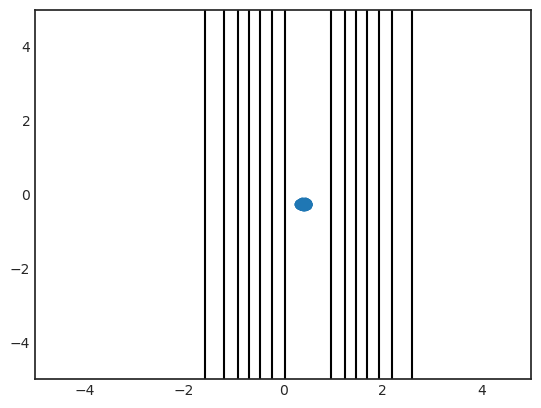

In [50]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

#préparation des données pour le contour
def f(x, y, u1 = 1/4, u2 = 3/4, sigma = 1):
    return (1/2*(1/np.sqrt(2*np.pi)*np.exp(-(x-u2)**2/2*sigma))+1/2*(1/np.sqrt(2*np.pi)*np.exp(-(x-u1)**2/2*sigma)))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#récupération résultat
res = test_gibbs_GMM(N = 1000, x0 = [0,0], z = z, y = y)
#plot
plt.contour(X, Y, Z, colors='black')
plt.scatter(res[:,0], res[:,1])

CROSS ENTROPY METHOD

In [191]:
import numpy as np
d = 3
mu = [5, 5, 5]  # vecteur de moyennes
cov = np.eye(d)  # matrice de covariance
n = 100
u = np.random.multivariate_normal(mu, cov, n)

In [192]:
def S(x):
    return(np.sum(100 * (u[:, 1:]-u[:, :-1])**2 + (u[:, 1:]-1)**2, axis = 1))


In [196]:
def update_mean(u):
    Su = S(u)
    S_sort = np.sort(Su)
    t = int(np.floor(len(u)*0.1))
    seuil = S_sort[t-1]
    u_select = u[Su<=seuil]
    new_e = np.mean(u_select, axis = 0)
    return(new_e)
    

In [197]:

mu = [5, 5, 5]  # vecteur de moyennes
cov = np.eye(d)  # matrice de covariance
n = 100
for i in range(10000):
    u = np.random.multivariate_normal(mu, cov, n)
    mu = update_mean(u)

mu


array([2.55700602, 2.47142396, 2.58883491])

In [155]:
#correction
def parametric_proba(l,n):
    d = l.shape
    y = []
    for i in range(n):
        y.append(np.normal(l, np.eye(d)))
    return(y)

def choose_best(y,m):
    Svals = {}
    for i in range(len(y)):
        Svals[i] = S(y[i])
    sortes = Svals.sort()
    y_best = []
    for i in range(m):
        j = sortes[i]
        y_best.append(y[j])
    return(y_best)

def update(l, y_best):
    lt = np.zeros_like(l)
    for yi in y_best:
        lt += yi
    return(lt/l.shape)

def crossentropy(d,n,m,T):
    l = np.zeros(d)
    for t in range(T):
        y = parametric_proba(l,n)
        y_best = choose_best(y,m)
        update(l, y_best)
        print("best point  :", y_best[0])
        print("value of the best point  :", S(y_best[0]))